In [1]:
!git clone https://github.com/yu02019/BEN.git

Cloning into 'BEN'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 47 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [2]:
cd BEN

/content/BEN


In [3]:
!gdown --id 1qHJkloqTg25gcot74YXKweEdXkYBRx-X
!unzip data_for_disagree.zip


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qHJkloqTg25gcot74YXKweEdXkYBRx-X
To: /content/BEN/data_for_disagree.zip
100% 38.0M/38.0M [00:00<00:00, 66.1MB/s]
Archive:  data_for_disagree.zip
   creating: annotation/
   creating: annotation/rater1/
  inflating: annotation/rater1/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz  
  inflating: annotation/rater1/Marmoset_M1_time4.nii.gz  
  inflating: annotation/rater1/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz  
  inflating: annotation/rater1/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz  
   creating: annotation/rater2/
  inflating: annotation/rater2/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz  
  inflating: annotation/rater2/Marmoset_M1_time4.nii.gz  
  inflating: annotation/rater2

In [4]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 18 kB/s 


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
import os
from utils.load_data import get_itk_array, get_itk_image, write_itk_imageArray


In [6]:
base_path = r'/content/BEN/'

experts_path_list = glob(base_path + r'/annotation/*')

experts_name = [os.path.basename(i) for i in experts_path_list]

nii_name = glob(base_path + r'/src/*')
nii_name = [os.path.basename(i) for i in nii_name]
nii_name.sort()  # Macaque Marmoset Mouse Rat

root_path = base_path + '/annotation'
label_list = glob(base_path + r'/label/*')
label_list.sort()
src_list = glob(base_path + r'/src/*')
src_list.sort()

smooth = 0.001
def dice_coef(y_true, y_pred):

    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)


''' load label '''
label = [] 
for i in range(4):
    nii = get_itk_array(label_list[i])
    label.append(nii)


In [7]:

''' for mouse '''
# load all mouse annotation
mouse = []
for i in experts_name:
    nii = get_itk_array(os.path.join(root_path, i, nii_name[2]))
    print('Loading: ', os.path.join(root_path, i, nii_name[2]))
    mouse.append(nii)
mouse = np.array(mouse)  # got (7, 35, 90, 90)
# compute dice
for i in range(7):
    print('next iter')
    for j in range(7):
        expert1 = mouse[j]
        other = mouse[i]
        print(dice_coef(expert1, other))
# compute disagree
mouse_disagree = np.zeros_like(nii)
for i in range(7):
    mouse_disagree = mouse_disagree + mouse[i]
mouse_disagree[mouse_disagree == 7] = 0
mouse_disagree[mouse_disagree <= 0] = 0  

Loading:  /content/BEN//annotation/rater7/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater3/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater4/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater2/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater6/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater1/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater5/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
next iter
1.0
0.9270883186516047
0.940570662440094
0.9542503875772698
0.9211335110922849
0.9241801242558388
0.9119782011153672
next iter
0.9270883186516047
1.0
0.9194294819415364
0.9158938143212666
0.9261921840412338
0.9077997248386083
0.8945464885576321
next iter
0.940570662440094
0.9194294819415364
1.0
0.9373483529397912
0.9125696199210289
0.9224954640

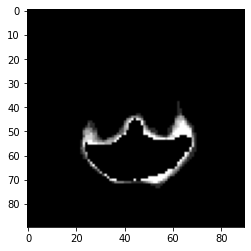

In [8]:
import matplotlib.pyplot as plt

plt.imshow(mouse_disagree[15],cmap='gray');plt.show()
# Disagree map in grayscale

In [9]:
''' for rat '''
rat = []
for i in experts_name:
    nii = get_itk_array(os.path.join(root_path, i, nii_name[-1]))
    print('Loading: ', os.path.join(root_path, i, nii_name[-1]))
    rat.append(nii)
rat = np.array(rat)
# compute dice
for i in range(7):
    print('next iter')
    for j in range(7):
        expert1 = rat[j]
        other = rat[i]
        print(dice_coef(expert1, other))
# compute disagree
rat_disagree = np.zeros_like(nii)
for i in range(7):
    rat_disagree = rat_disagree + rat[i]
rat_disagree[rat_disagree == 7] = 0
rat_disagree[rat_disagree <= 0] = 0

Loading:  /content/BEN//annotation/rater7/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater3/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater4/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater2/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater6/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater1/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater5/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
next iter
1.0
0.9434893020134457
0.9582502047494936
0.9418046764508329
0.9319622506000053
0.9567424343394755
0.9339140907962568
next iter
0.9434893020134457
1.0
0.9328727297137189
0.9133876279249704
0.9241068357923401
0.9340727978083228
0.9194561472158373
next iter
0.9582502047494936
0.9328727297137189
1.0
0.9341972555987718
0.9204970726365505
0.9501178778536138
0.9187561208208673
next iter
0.9418046764508329
0.9133876279249704
0.9341972555987

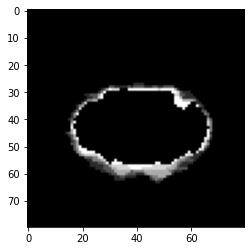

In [10]:
plt.imshow(rat_disagree[5],cmap='gray');plt.show()

In [11]:
''' for Macaque '''
macaque = []
for i in experts_name:
    nii = get_itk_array(os.path.join(root_path, i, nii_name[0]))
    print('Loading: ', os.path.join(root_path, i, nii_name[0]))
    macaque.append(nii)
macaque = np.array(macaque)
# compute dice
for i in range(7):
    print('next iter')
    for j in range(7):
        expert1 = macaque[j]
        other = macaque[i]
        print(dice_coef(expert1, other))
# compute disagree
macaque_disagree = np.zeros_like(nii)
for i in range(7):
    macaque_disagree = macaque_disagree + macaque[i]
macaque_disagree[macaque_disagree == 7] = 0
macaque_disagree[macaque_disagree <= 0] = 0


Loading:  /content/BEN//annotation/rater7/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater3/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater4/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater2/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater6/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater1/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater5/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
next iter
1.0
0.9537498440191617
0.9501448171818809
0.9607498537591235
0.9459341889809603
0.9529029821835017
0.9423509894447897
next iter
0.9537498440191617
1.0
0.9419496772063816
0.9572022029154338
0.9460151265825988
0.9469417555314174
0.9392114573089055
next iter
0.9501

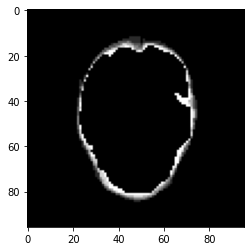

In [12]:
 plt.imshow(macaque_disagree[35],cmap='gray');plt.show()

In [13]:
''' for Marmoset '''
marmoset = []
for i in experts_name:
    nii = get_itk_array(os.path.join(root_path, i, nii_name[1]))
    print('Loading: ', os.path.join(root_path, i, nii_name[1]))
    marmoset.append(nii)
marmoset = np.array(marmoset)
# compute dice
for i in range(7):
    print('next iter')
    for j in range(7):
        expert1 = marmoset[j]
        other = marmoset[i]
        print(dice_coef(expert1, other))
# compute disagree
marmoset_disagree = np.zeros_like(nii)
for i in range(7):
    marmoset_disagree = marmoset_disagree + marmoset[i]
marmoset_disagree[marmoset_disagree == 7] = 0
marmoset_disagree[marmoset_disagree <= 0] = 0  

Loading:  /content/BEN//annotation/rater7/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater3/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater4/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater2/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater6/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater1/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater5/Marmoset_M1_time4.nii.gz
next iter
1.0
0.940650728920941
0.955945322107148
0.9431049384067774
0.9428506265401445
0.9496017361500149
0.9377236947722465
next iter
0.940650728920941
1.0
0.9412810181611693
0.9352209363325451
0.9403250135646672
0.9257148826358556
0.9164772145696685
next iter
0.955945322107148
0.9412810181611693
1.0
0.937096457994018
0.9368175010149409
0.9388745980130694
0.9292568147459445
next iter
0.9431049384067774
0.9352209363325451
0.937096457994018
1.0
0.9397214690422796
0.9460851220757115
0.9463327052360389
next iter
0.9428506265401

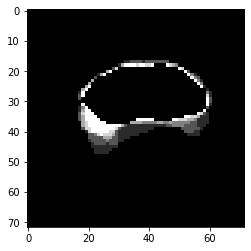

In [14]:
 plt.imshow(marmoset_disagree[25],cmap='gray');plt.show()

In [15]:
'''
compare each expert with label
'''
for i in range(mouse.shape[0]):
    print(dice_coef(mouse[i], label[2]))

for i in range(rat.shape[0]):
    print(dice_coef(rat[i], label[-1]))

for i in range(macaque.shape[0]):
    print(dice_coef(macaque[i], label[0]))

for i in range(marmoset.shape[0]):
    print(dice_coef(marmoset[i], label[1]))


0.9299798414225342
0.9254200712142103
0.9285731721761364
0.924800647905505
0.9216016728394372
0.9304040123266487
0.9024846403593462
0.950943398059279
0.9345196538652284
0.9395017816257059
0.9349507347014198
0.9112578086973128
0.9460298256744446
0.9224325074280298
0.9540659977678873
0.9478718371471143
0.9436301511609483
0.9513498700761964
0.9415566611557646
0.9978514972845848
0.939280540465951
0.9639035532190121
0.9458066062206427
0.9567606864970538
0.9449489024507904
0.9510776132564975
0.9528790155108107
0.939698219822813


In [16]:
from skimage import measure


def draw_2D_contours(pred, src=None, ax1=None, color='gray', linewidth=2):
    our = pred  # (90, 90)

    contours = measure.find_contours(our, 0.5)

    for n, contour in enumerate(contours):
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color=color, alpha=0.6)  

def draw_contours(pred=None, pred_our=None, gt=None, src=None, save_img=None, colorbar=None, linewidth=2.0):
    """
    06/28 增加了 多个pred堆叠的处理

    :param pred:
    :param pred_our:
    :param gt:
    :param src:
    :param save_img:
    :param colorbar: 控制不同rater的颜色
    :return:
    """
    our = pred  # (90, 90) or (7(num of nii), 90, 90)
    rawimg = src

    # plot raw 原图作为铺垫
    fig, ax1 = plt.subplots(1, 1)  # fig尺寸设置为800*800像素
    ax1.imshow(rawimg, plt.cm.gray)  # 右图cmap

    # 累加各个nii的contour 到画布中
    if type(our) != type(None):
        if our.ndim >= 3:
            for i in range(our.shape[0]):
                if colorbar == None:
                    draw_2D_contours(pred=our[i], src=src,
                                     color=None,
                                     ax1=ax1, linewidth=linewidth)  # 'gray'
                elif colorbar != None:
                    draw_2D_contours(pred=our[i], src=src,
                                     color=colorbar[i],
                                     ax1=ax1, linewidth=linewidth)
        else:
            draw_2D_contours(pred=our, src=src, ax1=ax1, linewidth=linewidth)

    if pred_our is not None:
        contours_pred_our = measure.find_contours(pred_our, 0.5)
        for n, contour in enumerate(contours_pred_our):  # mask
            ax1.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color='red', alpha=0.7
                     # linestyle='--',  # '--'虚线
                     )

    if gt is not None:
        contours_gt = measure.find_contours(gt, 0.5)
        for n, contour in enumerate(contours_gt):  # mask
            ax1.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color='red', alpha=0.6)  # deepskyblue

    if save_img:  # filename
        fig.savefig(save_img)
        pass
    # plt.show()

In [17]:
# load raw image
nii_mouse = get_itk_array(src_list[2])
nii_rat = get_itk_array(src_list[3])
nii_macaque = get_itk_array(src_list[0])
nii_marmoset = get_itk_array(src_list[1])

# load our model prediction
nii_mouse_our = get_itk_array(r'BEN_predict/ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz')
nii_rat_our = get_itk_array(r'BEN_predict/sub-001_ses-2_acq-EPI_T2w.nii.gz')
nii_marmoset_our = get_itk_array(r'BEN_predict/M1_time4.nii.gz')
nii_macaque_our = get_itk_array(r'BEN_predict/sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz')


In [18]:
from utils.transparent_imshow import transp_imshow, plot_no_margin

# color bar
colors = sns.color_palette('Set2');


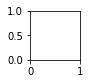

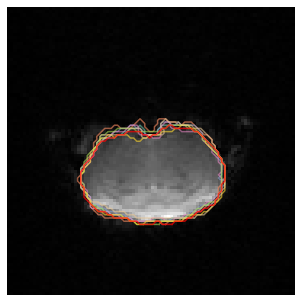

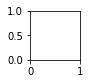

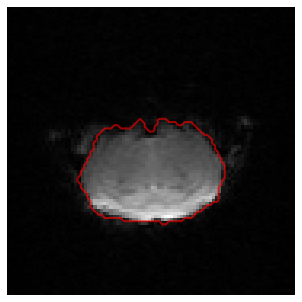

In [19]:
''' mouse '''
# 不同轮廓
fig, ax = plt.subplots(1, 1)
draw_contours(pred=mouse[:, 21, :, :], pred_our=nii_mouse_our[21], linewidth=1.5,
              # gt=mouse[1, 21],
              src=nii_mouse[21], colorbar=colors)
plot_no_margin(img=nii_mouse_our[21], fig=fig)
plt.show()

# raw & gt
fig, ax = plt.subplots(1, 1)
draw_contours(gt=mouse[1, 21],
              src=nii_mouse[21], colorbar=colors)
plot_no_margin(img=nii_mouse_our[21], fig=fig)
# plt.savefig('Mouse_raw&GT.png', dpi=600)
plt.show()

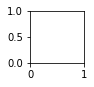

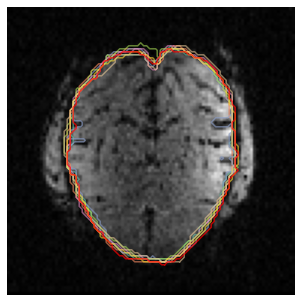

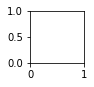

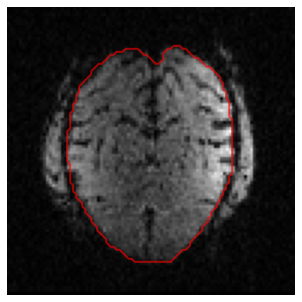

In [20]:
''' Macaque '''
# 不同轮廓
fig, ax = plt.subplots()
draw_contours(pred=macaque[:, 30], pred_our=nii_macaque_our[30], linewidth=1.5,
              # gt=macaque[1, 30],
              src=nii_macaque[30], colorbar=colors)
plot_no_margin(img=nii_macaque_our[30], fig=fig)
# plt.savefig('Macaque_contours_2.png', dpi=600)
plt.show()

# raw & gt
fig, ax = plt.subplots()
draw_contours(gt=macaque[1, 30],
              src=nii_macaque[30], colorbar=colors)
plot_no_margin(img=nii_macaque_our[30], fig=fig)
# plt.savefig('Macaque_raw&GT.png', dpi=600)
plt.show()

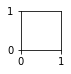

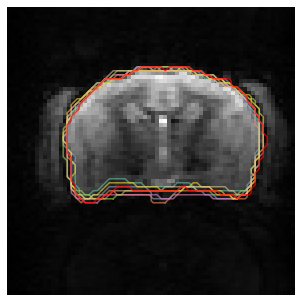

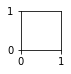

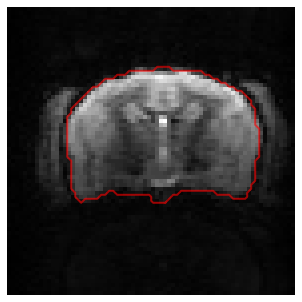

In [21]:
''' Marmoset '''
# 不同轮廓
fig, ax = plt.subplots()
draw_contours(pred=marmoset[:, 20], pred_our=nii_marmoset_our[20], linewidth=1.5,
              # gt=marmoset[1, 20],
              src=nii_marmoset[20], colorbar=colors)
plot_no_margin(img=nii_marmoset_our[20], fig=fig)
# plt.savefig('Marmoset_contours_2.png', dpi=600)
plt.show()

# raw & gt
fig, ax = plt.subplots()
draw_contours(gt=marmoset[1, 20],
              src=nii_marmoset[20], colorbar=colors)
plot_no_margin(img=nii_marmoset_our[20], fig=fig)
# plt.savefig('Marmoset_raw&GT.png', dpi=600)
plt.show()

(35, 90, 90)
(7, 35, 90, 90)


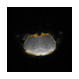

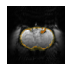

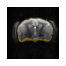

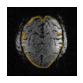

In [22]:

print(mouse_disagree.shape)
print(mouse.shape)

from utils.transparent_imshow import transp_imshow, plot_no_margin

cmap = 'Wistia'
# Mouse
fig, ax = plt.subplots()  
plt.imshow(nii_mouse[21], cmap='gray')
plot_no_margin(img=nii_mouse[21], fig=fig)
# plt.savefig('Mouse_raw.png', dpi=600)
transp_imshow(mouse_disagree[21], cmap=cmap, alpha=0.6)
# plt.savefig('Mouse.png', dpi=600)
plt.show()
# Rat
fig, ax = plt.subplots()  
plt.imshow(nii_rat[8], cmap='gray')
plot_no_margin(img=nii_rat[8], fig=fig)
# plt.savefig('Rat.png', dpi=600)
transp_imshow(rat_disagree[8], cmap=cmap, alpha=0.6)
# plt.savefig('Rat_raw.png', dpi=600)
plt.show()
# Marmoset
fig, ax = plt.subplots()  
plt.imshow(nii_marmoset[20], cmap='gray')
plot_no_margin(img=nii_marmoset[20], fig=fig)
# plt.savefig('Marmoset_raw.png', dpi=600)
transp_imshow(marmoset_disagree[20], cmap=cmap, alpha=0.6)
# plt.savefig('Marmoset.png', dpi=600)
plt.show()
# Macaque
fig, ax = plt.subplots()  
plt.imshow(nii_macaque[30], cmap='gray')
plot_no_margin(img=nii_macaque[30], fig=fig)
# plt.savefig('Macaque_raw.png', dpi=600)
transp_imshow(macaque_disagree[30], cmap=cmap, alpha=0.6)
# plt.savefig('Macaque.png', dpi=600)
plt.show()

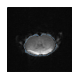

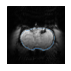

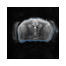

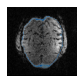

In [23]:
'''
plot UC map
'''
# load UC map
mouse_uc = get_itk_array(r'BEN_uc/Mouse-pred-uc-sample/alea_ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz')
rat_uc = get_itk_array(r'BEN_uc/Rat-pred-uc-sample/alea_sub-001_ses-2_acq-EPI_T2w.nii.gz')
marmoset_uc = get_itk_array(r'BEN_uc/Marmoset-pred-uc-sample/alea_M1_time4.nii.gz')
macaque_uc = get_itk_array(r'BEN_uc/Macaque-pred-uc-sample/alea_sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz')

cmap = 'Blues'  
# Mouse
fig, ax = plt.subplots()  
plt.imshow(nii_mouse[22], cmap='gray')
plot_no_margin(img=nii_mouse[22], fig=fig)
transp_imshow(mouse_uc[22], cmap=cmap, )
plt.savefig('Mouse_uc.png', dpi=600)
plt.show()
# Rat
fig, ax = plt.subplots()  
plt.imshow(nii_rat[8], cmap='gray')
plot_no_margin(img=nii_rat[8], fig=fig)
transp_imshow(rat_uc[8], cmap=cmap, )
plt.savefig('Rat_uc.png', dpi=600)
plt.show()
# Marmoset
fig, ax = plt.subplots()  
plt.imshow(nii_marmoset[20], cmap='gray')
plot_no_margin(img=nii_marmoset[20], fig=fig)
transp_imshow(marmoset_uc[20], cmap=cmap, )
plt.savefig('Marmoset_uc.png', dpi=600)
plt.show()
# Macaque
fig, ax = plt.subplots()  
plt.imshow(nii_macaque[30], cmap='gray')
plot_no_margin(img=nii_macaque[30], fig=fig)
transp_imshow(macaque_uc[30], cmap=cmap, )
plt.savefig('Macaque_uc.png', dpi=600)
plt.show()


In [24]:
''' compute Dice from 7 UC samples '''
from glob import glob

# mouse
print('Mouse')
sample_mosue_list = glob(r'BEN_uc/Mouse-pred-uc-sample/?_*')
label = get_itk_array(r'label/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz')
for i in sample_mosue_list:
    nii = get_itk_array(i)
    nii[nii >= 0.5] = 1
    nii[nii < 0.5] = 0
    print(dice_coef(nii, label))
# rat
print('Rat')
sample_rat_list = glob(r'BEN_uc/Rat-pred-uc-sample/?_*')
label = get_itk_array(r'label/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz')
for i in sample_rat_list:
    nii = get_itk_array(i)
    nii[nii >= 0.5] = 1
    nii[nii < 0.5] = 0
    print(dice_coef(nii, label))

# marmoset
print('marmoset')
sample_marmoset_list = glob(r'BEN_uc/Marmoset-pred-uc-sample/?_*')
label = get_itk_array(r'label/Marmoset_M1_time4.nii.gz')
for i in sample_marmoset_list:
    nii = get_itk_array(i)
    nii[nii >= 0.5] = 1
    nii[nii < 0.5] = 0
    print(dice_coef(nii, label))

# macaque
print('macaque')
sample_macaque_list = glob(r'BEN_uc/Macaque-pred-uc-sample/?_*')
label = get_itk_array(r'label/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz')
for i in sample_macaque_list:
    nii = get_itk_array(i)
    nii[nii >= 0.5] = 1
    nii[nii < 0.5] = 0
    print(dice_coef(nii, label))


Mouse
0.9419086179746714
0.9442203053053972
0.943130513413093
0.9409841439318026
0.942990152689308
0.9417298525290215
0.9398973415796233
Rat
0.9556019195636353
0.9530264949154005
0.952672424939978
0.9484970759823692
0.951358825941033
0.95378779757859
0.9487328462445412
marmoset
0.8929085323197509
0.8988044266303321
0.897612950632718
0.8982393334407763
0.9006371574937834
0.8952654251939588
0.9004154807740301
macaque
0.8958449614905122
0.9030986550939324
0.9011020067986366
0.89851076604456
0.905173984354242
0.896997740334676
0.9041558554179341


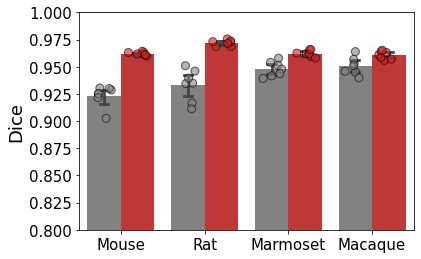

In [25]:

'''
plot Dice expert VS uc sample
画 柱状图
'''

import seaborn as sns

# 定制 color_bar
colors = sns.color_palette("Greys")[2:4]
colors.pop(0)
colors.append(sns.color_palette("Reds")[4])
# sns.palplot(colors)
# plt.show()

data = pd.read_excel(r'Fig7-sample-Dice.xlsx')

sns.barplot(data=data, x='Species', y='Dice', hue='Method',
            capsize=.1,  
            palette=colors,
            )
sns.stripplot(data=data, x='Species', y='Dice', hue='Method',
              dodge=True,  
              jitter=0.25,
              alpha=0.6,
              size=8,
              palette=colors,
              edgecolor='black', 
              linewidth=1,  
              )

plt.legend('', frameon=False)  
plt.ylim([0.8, 1.0])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='')
plt.ylabel(ylabel='Dice', fontsize=18)
plt.show()
